# AdaBoost

AdaBoost, short for Adaptive Boosting, is an ensemble machine learning algorithm that can be used in a wide variety of classification and regression tasks. It is a supervised learning algorithm that is used to classify data by combining multiple weak or base learners (e.g., decision trees) into a strong learner. AdaBoost works by weighting the instances in the training dataset based on the accuracy of previous classifications.

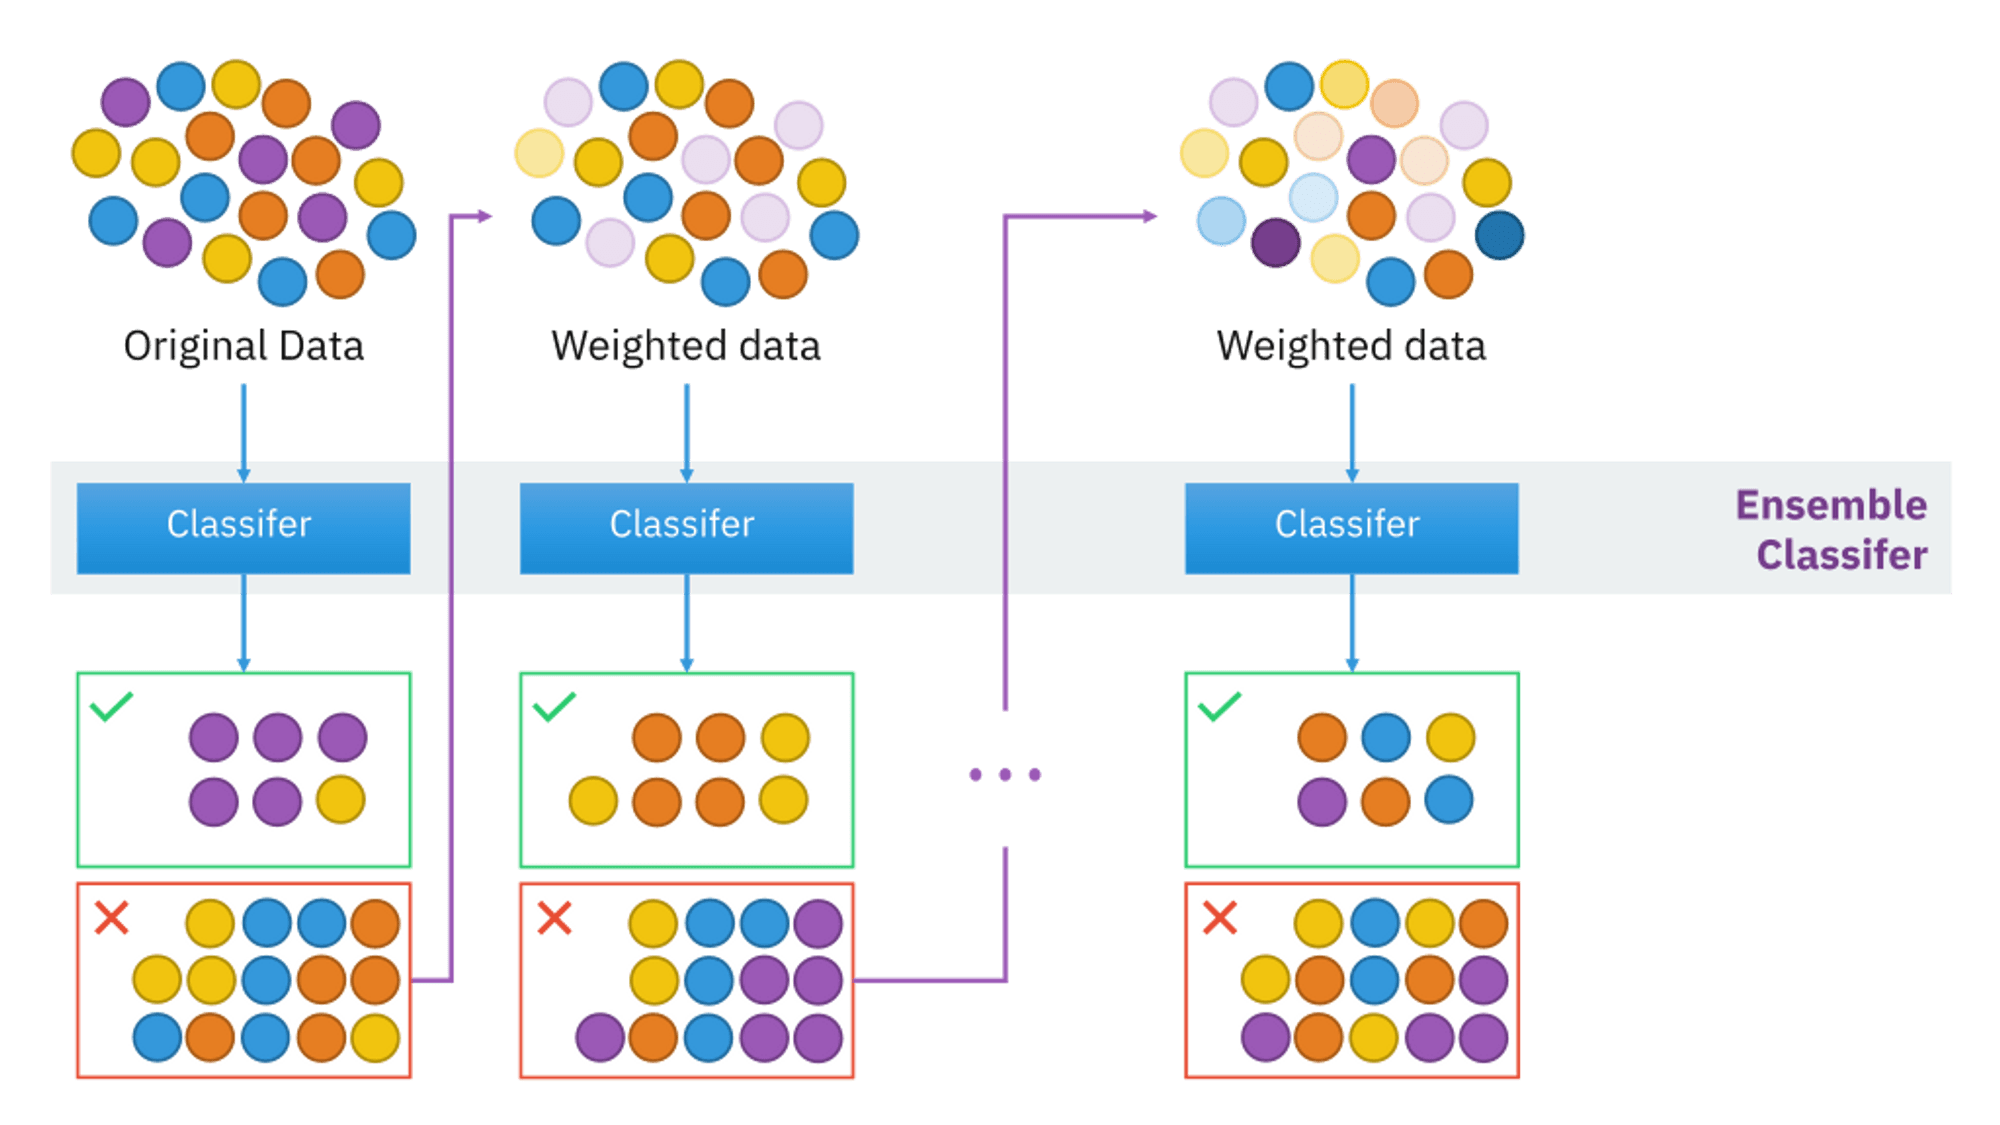

AdaBoost's most commonly used estimator is decision trees with one level, which is decision trees with just one split. These trees are often referred to as **Decision Stumps**.

In [3]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [34]:
colnames = ['1', '2', '3']
df = pd.read_csv(r'G:\course\Youtobe ML\ML Algorithm mathematical and geometric intuition - Copy\Supervised Learning\Logistic Regression\ushape.csv',names=colnames)
df.head()

,1,2,3
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       100 non-null    float64
 1   2       100 non-null    float64
 2   3       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


<Axes: xlabel='1', ylabel='2'>

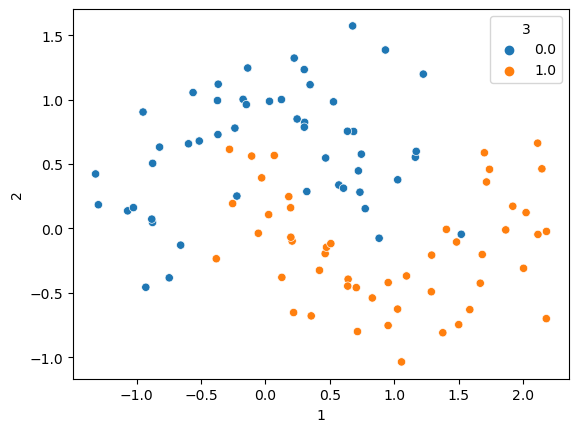

In [37]:
import seaborn as sns
sns.scatterplot(x=df['1'],y=df['2'],hue=df['3'])

In [53]:
df['weights'] = 1/df.shape[0]
df

,1,2,3,y_pred,weights
0,0.031595,0.986988,0.0,0.0,0.01
1,2.115098,-0.046244,1.0,1.0,0.01
2,0.882490,-0.075756,0.0,1.0,0.01
3,-0.055144,-0.037332,1.0,1.0,0.01
4,0.829545,-0.539321,1.0,1.0,0.01
...,...,...,...,...,...
95,1.699453,0.587720,1.0,0.0,0.01
96,0.218623,-0.652521,1.0,1.0,0.01
97,0.952914,-0.419766,1.0,1.0,0.01
98,-1.318500,0.423112,0.0,0.0,0.01


### Step 1: Create a decision stump

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1)

X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

### Step 2 - Train 1st model

[Text(0.5, 0.75, 'x[1] <= 0.02\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.25, 0.25, 'gini = 0.219\nsamples = 40\nvalue = [5, 35]'),
 Text(0.75, 0.25, 'gini = 0.375\nsamples = 60\nvalue = [45, 15]')]

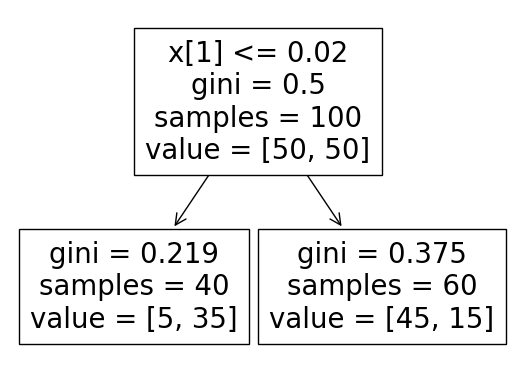

In [55]:
dt1.fit(X,y)

from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

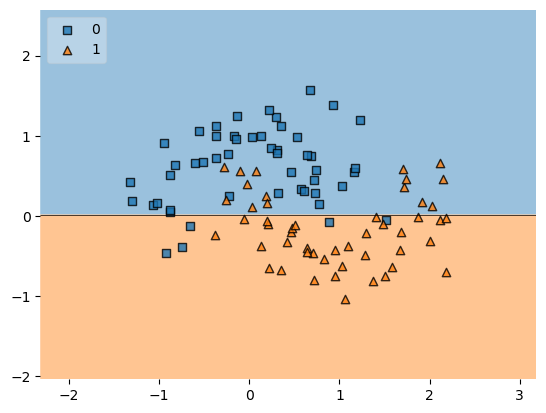

In [56]:
y = y.astype(np.int_)
plot_decision_regions(X=X, y=y, clf=dt1, legend=2)

In [57]:
df['y_pred'] = dt1.predict(X)
df.head()

,1,2,3,y_pred,weights
0,0.031595,0.986988,0.0,0.0,0.01
1,2.115098,-0.046244,1.0,1.0,0.01
2,0.882490,-0.075756,0.0,1.0,0.01
3,-0.055144,-0.037332,1.0,1.0,0.01
4,0.829545,-0.539321,1.0,1.0,0.01


In [58]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

### Step 3 - calculate model weight

In [59]:
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

### Step 4 - Update weights

In [62]:
def update_row_weights(row,alpha=0.423):
  if row['3'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [63]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)
df

,1,2,3,y_pred,weights,updated_weights
0,0.031595,0.986988,0.0,0.0,0.01,0.006551
1,2.115098,-0.046244,1.0,1.0,0.01,0.006551
2,0.882490,-0.075756,0.0,1.0,0.01,0.015265
3,-0.055144,-0.037332,1.0,1.0,0.01,0.006551
4,0.829545,-0.539321,1.0,1.0,0.01,0.006551
...,...,...,...,...,...,...
95,1.699453,0.587720,1.0,0.0,0.01,0.015265
96,0.218623,-0.652521,1.0,1.0,0.01,0.006551
97,0.952914,-0.419766,1.0,1.0,0.01,0.006551
98,-1.318500,0.423112,0.0,0.0,0.01,0.006551


In [64]:
df['updated_weights'].sum()

0.8293697656827366

### Step 5 : Normalize the new weights

In [73]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()
df

,1,2,3,y_pred,weights,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower
0,0.031595,0.986988,0.0,0.0,0.01,0.006551,0.007899,0.007899,0.000000
1,2.115098,-0.046244,1.0,1.0,0.01,0.006551,0.007899,0.015797,0.007899
2,0.882490,-0.075756,0.0,1.0,0.01,0.015265,0.018406,0.034203,0.015797
3,-0.055144,-0.037332,1.0,1.0,0.01,0.006551,0.007899,0.042101,0.034203
4,0.829545,-0.539321,1.0,1.0,0.01,0.006551,0.007899,0.050000,0.042101
...,...,...,...,...,...,...,...,...,...
95,1.699453,0.587720,1.0,0.0,0.01,0.015265,0.018406,0.968406,0.950000
96,0.218623,-0.652521,1.0,1.0,0.01,0.006551,0.007899,0.976304,0.968406
97,0.952914,-0.419766,1.0,1.0,0.01,0.006551,0.007899,0.984203,0.976304
98,-1.318500,0.423112,0.0,0.0,0.01,0.006551,0.007899,0.992101,0.984203


In [74]:
df['nomalized_weights'].sum()

0.9999999999999996

In [75]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']
df[['1','2','3','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,1,2,3,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,0.031595,0.986988,0.0,0.01,0.0,0.006551,0.000000,0.007899
1,2.115098,-0.046244,1.0,0.01,1.0,0.006551,0.007899,0.015797
2,0.882490,-0.075756,0.0,0.01,1.0,0.015265,0.015797,0.034203
3,-0.055144,-0.037332,1.0,0.01,1.0,0.006551,0.034203,0.042101
4,0.829545,-0.539321,1.0,0.01,1.0,0.006551,0.042101,0.050000
...,...,...,...,...,...,...,...,...
95,1.699453,0.587720,1.0,0.01,0.0,0.015265,0.950000,0.968406
96,0.218623,-0.652521,1.0,0.01,1.0,0.006551,0.968406,0.976304
97,0.952914,-0.419766,1.0,0.01,1.0,0.006551,0.976304,0.984203
98,-1.318500,0.423112,0.0,0.01,0.0,0.006551,0.984203,0.992101


### Step 6 : Create new dataset with columns falling in the range - REPEAT

In [79]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [91]:
index_values = create_new_dataset(df)
second_df = df.iloc[index_values,[0,1,2,3,4]]
second_df

,1,2,3,y_pred,weights
27,2.181372,-0.022917,1.0,1.0,0.01
82,1.290037,-0.206914,1.0,1.0,0.01
80,-0.137726,1.245326,0.0,0.0,0.01
25,-0.746629,-0.382963,0.0,1.0,0.01
37,0.181211,0.247177,1.0,0.0,0.01
...,...,...,...,...,...
93,1.376715,-0.809151,1.0,1.0,0.01
9,1.715796,0.360695,1.0,0.0,0.01
1,2.115098,-0.046244,1.0,1.0,0.01
11,2.003445,-0.309150,1.0,1.0,0.01


In [92]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt2 = DecisionTreeClassifier(max_depth=1)
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 0.623\ngini = 0.476\nsamples = 100\nvalue = [39, 61]'),
 Text(0.25, 0.25, 'gini = 0.39\nsamples = 83\nvalue = [22, 61]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]')]

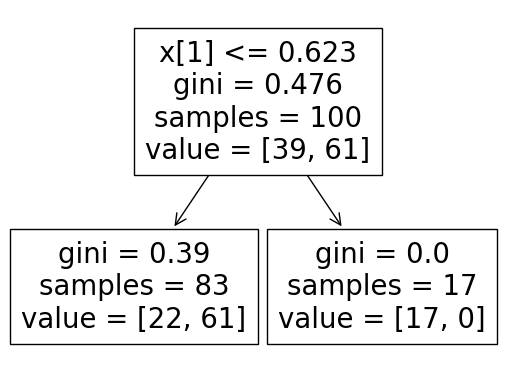

In [93]:
plot_tree(dt2)

<Axes: >

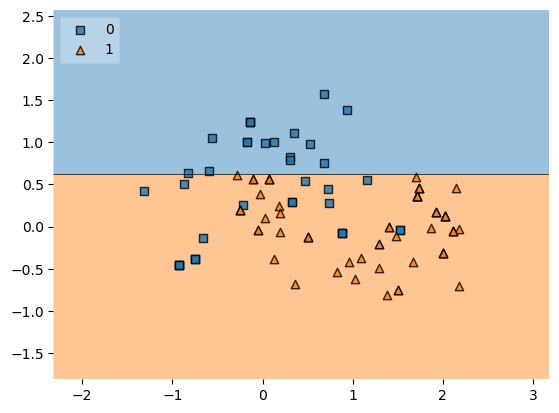

In [94]:
y = y.astype(np.int_)
plot_decision_regions(X, y, clf=dt2, legend=2)

In [95]:
second_df['y_pred'] = dt2.predict(X)
alpha2 = calculate_model_weight(0.1)

In [96]:
def update_row_weights(row,alpha=1.09):
  if row['3'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [100]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']
second_df[['1','2','3','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,1,2,3,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
27,2.181372,-0.022917,1.0,0.01,1.0,0.003668,0.000000,0.003668
82,1.290037,-0.206914,1.0,0.01,1.0,0.003668,0.003668,0.007336
80,-0.137726,1.245326,0.0,0.01,0.0,0.003668,0.007336,0.011004
25,-0.746629,-0.382963,0.0,0.01,1.0,0.032449,0.011004,0.043454
37,0.181211,0.247177,1.0,0.01,1.0,0.003668,0.043454,0.047122
...,...,...,...,...,...,...,...,...
93,1.376715,-0.809151,1.0,0.01,1.0,0.003668,0.981659,0.985327
9,1.715796,0.360695,1.0,0.01,1.0,0.003668,0.985327,0.988996
1,2.115098,-0.046244,1.0,0.01,1.0,0.003668,0.988996,0.992664
11,2.003445,-0.309150,1.0,0.01,1.0,0.003668,0.992664,0.996332


In [101]:
index_values = create_new_dataset(second_df)
third_df = second_df.iloc[index_values,[0,1,2,3,4]]
third_df

,1,2,3,y_pred,weights
20,-0.597024,0.657236,0.0,0.0,0.01
73,2.022971,0.123251,1.0,1.0,0.01
34,0.068733,0.566485,1.0,1.0,0.01
87,0.733461,0.281619,0.0,1.0,0.01
3,-0.055144,-0.037332,1.0,1.0,0.01
...,...,...,...,...,...
87,0.733461,0.281619,0.0,1.0,0.01
34,0.068733,0.566485,1.0,1.0,0.01
34,0.068733,0.566485,1.0,1.0,0.01
34,0.068733,0.566485,1.0,1.0,0.01


In [118]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = third_df.iloc[:,0:2].values
y = third_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

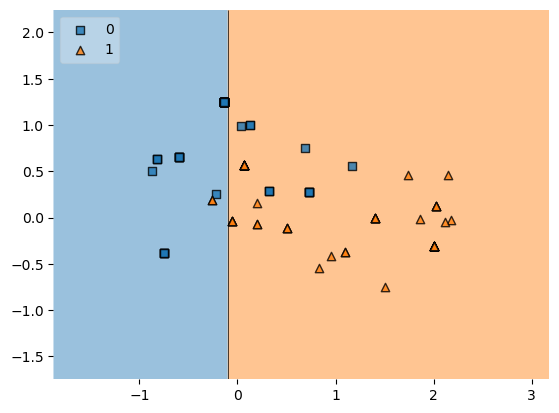

In [119]:
y = y.astype(np.int_)
plot_decision_regions(X, y, clf=dt3, legend=2)

In [120]:
third_df['y_pred'] = dt3.predict(X)

In [121]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [122]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


### Prediction

In [123]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([0.])

In [124]:
dt2.predict(query)

array([0.])

In [125]:
dt3.predict(query)

array([1.])

In [126]:
alpha1*1 + alpha2*(1) + alpha3*(1)

1.09861228866811

In [127]:
np.sign(1.09)

1.0

In [128]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([0.])

In [129]:
dt2.predict(query)

array([0.])

In [130]:
dt3.predict(query)

array([1.])

In [131]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

-0.2513144282809062

In [132]:
np.sign(-0.25)

-1.0